In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Read the data
white = pd.read_csv('winequality-white.csv', sep = ';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
print(white.shape)

(4898, 12)


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# Search for missing values
print(white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Get column names
col_white_names = white.columns
print(col_white_names)
# Get column data types
print(white.dtypes)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
correlations = white.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


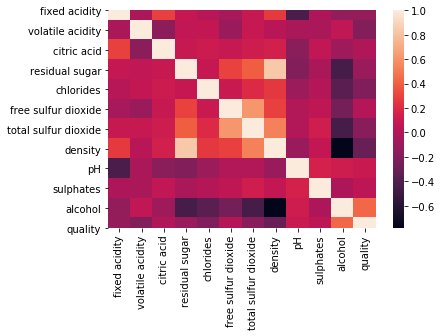

In [8]:
sns.heatmap(white.corr())
plt.show()

In [9]:
# Separate target from training features

y = white.quality
x = white.drop('quality', axis=1)

In [10]:
# Split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [11]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the 10 features selected above.  
print(regressor.coef_)

[ 7.08672075e-02 -1.91050896e+00  3.92700519e-02  8.24994938e-02
 -3.62076438e-02  3.79589490e-03 -5.95091904e-04 -1.47240724e+02
  7.30192091e-01  6.56917370e-01  1.94989276e-01]


In [12]:
# To predict the quality of wine with this model

train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.78905927 5.63880653 5.41273412 ... 6.04017748 6.83454528 5.79454251]
[5.43469856 5.58443986 5.99680474 ... 5.54769464 5.70088267 5.423387  ]


In [13]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)



0.7486195019407215
0.7565726820536687


In [14]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

[5. 6. 6. ... 6. 6. 5.]
Mean Absolute Error: 0.5872488344616085
Mean Squared Error: 0.5724022232298817
Root Mean Squared Error: 0.7565726820536687


In [15]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,x.columns)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.070867
volatile acidity        -1.910509
citric acid              0.039270
residual sugar           0.082499
chlorides               -0.036208
free sulfur dioxide      0.003796
total sulfur dioxide    -0.000595
density               -147.240724
pH                       0.730192
sulphates                0.656917
alcohol                  0.194989
